
# EDA

In [1]:
import os
import sys
print(f"Python: {sys.version[:6]}")
import numpy as np
print('numpy: {}'.format(np.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
import sklearn
print('scikit-learn: {}'.format(sklearn.__version__))
import scipy
print('scipy: {}'.format(scipy.__version__))

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline

import toolbelt
print(f'toolbelt: {toolbelt.__version__}')

Python: 3.7.6 
numpy: 1.19.2
pandas: 1.2.3
seaborn: 0.11.1
scikit-learn: 0.24.1
scipy: 1.6.1
matplotlib: 3.3.4
toolbelt: 0.0.3


## Read the Data and Inspect

#### From the website:

Variable|Definition|Key
----|----|----
survival|Survival|0 = No, 1 = Yes
pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Sex|
Age|Age in years|
sibsp|# of siblings / spouses aboard the Titanic|
parch|# of parents / children aboard the Titanic|
ticket|Ticket number|
fare|Passenger fare|
cabin|Cabin number|
embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
df = pd.read_csv('./titanic/train.csv', index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Target Variable - "Survived"
- Binary value where 1 means the person survived the wreck

In [5]:
1- df.Survived.mean()

0.6161616161616161

### What does that mean: 
- the data is not perfectly balanced (50/50)
- If I always predict that the passender survived, I'm correct 62% of the time
----
# Continuous Numeric Values:

### Let's look at a specific feature - "Age"
 - It is a continuous value (not a category)
 - It has null values
 - We know (from reading the documentation) that some of them are x.5, which means the age was estimated
 
## The 5 #'s
- min, max, median and quartiles(x2)
- Also worth looking at mean and variance

*Note: when Age looks like x.5 it means the age was estimated*

In [6]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Most common values:

In [7]:
df.Age.value_counts().head()

24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
Name: Age, dtype: int64

### Least Common values

In [8]:
df.Age.value_counts().tail()

55.50    1
74.00    1
0.92     1
70.50    1
12.00    1
Name: Age, dtype: int64

## Distribution of the data:

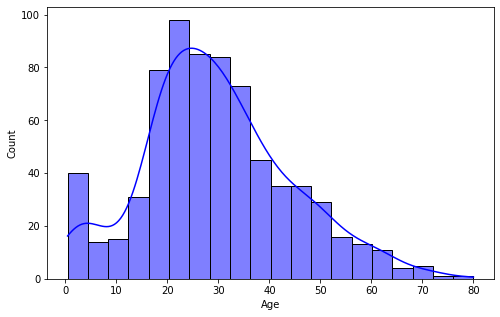

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df.Age, kde=True, color='b', ax=ax)
plt.show()

## Distributions given the target variable

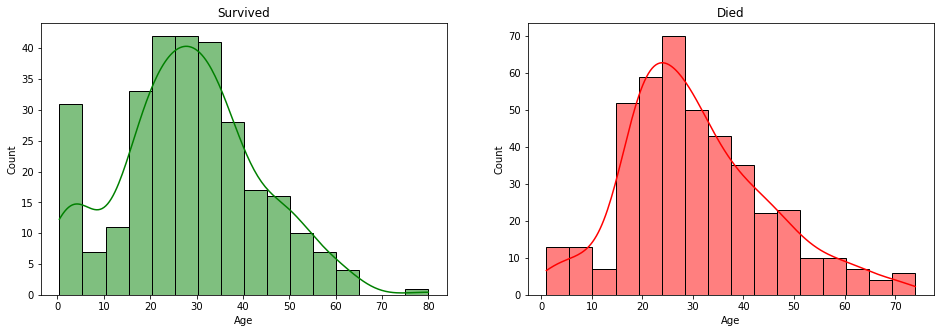

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

sns.histplot(df[df.Survived==1].Age, kde=True, ax=ax[0], color='g')
ax[0].set_title('Survived')
sns.histplot(df[df.Survived==0].Age, kde=True, ax=ax[1], color='r')
ax[1].set_title('Died')
plt.show()

## Handle Null Values:

1. Drop the row from the table (gives us the distributions we see above)
2. Replace the null with some value (what does that look like?)
3. Bucketize it - convert it to categorical value(s)

### What does it look like if we fill with the mean:

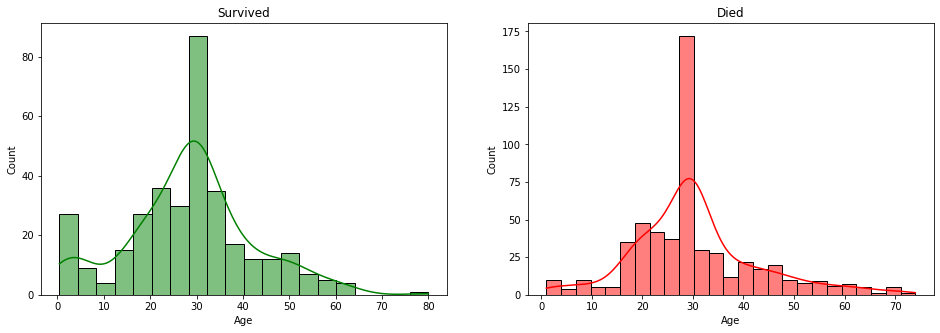

In [11]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

sns.histplot(df[df.Survived==1].Age.fillna(df.Age.mean()), kde=True, ax=ax[0], color='g')
sns.histplot(df[df.Survived==0].Age.fillna(df.Age.mean()), kde=True, ax=ax[1], color='r')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

### Does my test data have null values?

In [12]:
_df = pd.read_csv('./titanic/test.csv')
_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### I have to deal with the  fact that the Age column has null values in both my test and train data.
 - If I only had null values in my training data, I could drop those rows and train on everything else. 
 
## What about buckets:

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

In [14]:
uniform_bins_4 = {_age: _bin for _age, _bin in zip(df.Age.dropna(), KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform').fit_transform(df.Age.dropna().values.reshape(-1, 1)).reshape(1,-1)[0])}

In [15]:
quantile_bins_4 = {_age: _bin for _age, _bin in zip(df.Age.dropna(), KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile').fit_transform(df.Age.dropna().values.reshape(-1, 1)).reshape(1,-1)[0])}

In [16]:
df['age_uniform'] = df.Age.apply(lambda x: uniform_bins_4[x] if x in uniform_bins_4.keys() else 4)
df['age_quantile'] = df.Age.apply(lambda x: quantile_bins_4[x] if x in uniform_bins_4.keys() else 4)

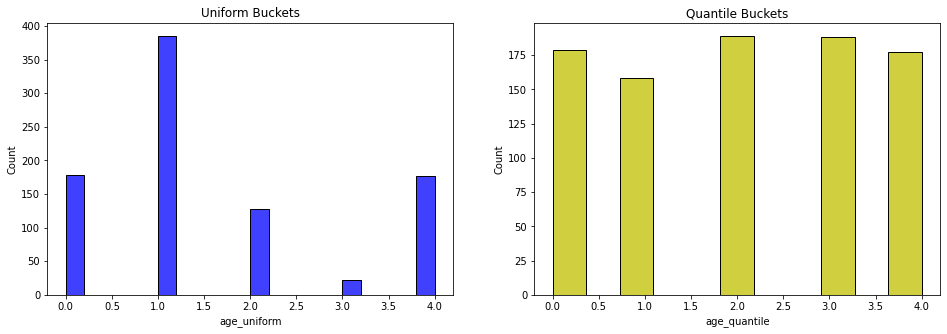

In [17]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

sns.histplot(df['age_uniform'], ax=ax[0], color='b')
sns.histplot(df['age_quantile'], ax=ax[1], color='y')
ax[0].set_title('Uniform Buckets')
ax[1].set_title('Quantile Buckets')
plt.show()

## Switch values to the Fare (price of the ticket)

### What to do with skewed data:

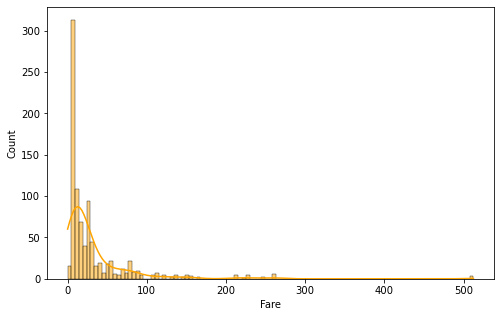

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df.Fare, kde=True, color='orange', ax=ax)
plt.show()

## $Log_e$ Transformation

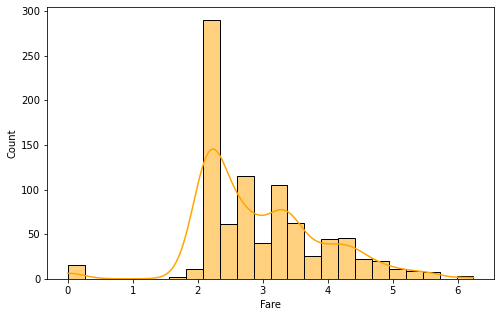

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(np.log1p(df.Fare), kde=True, color='orange', ax=ax)
plt.show()

## Box-Cox Transformation
*At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. The transformation of Y has the form*
$$y(\lambda) = \begin{cases}\frac{y^{\lambda}-1}{\lambda} & \lambda\ne 0 \\ log(y) & \lambda=0 \end{cases}$$

In [20]:
from sklearn.preprocessing import power_transform

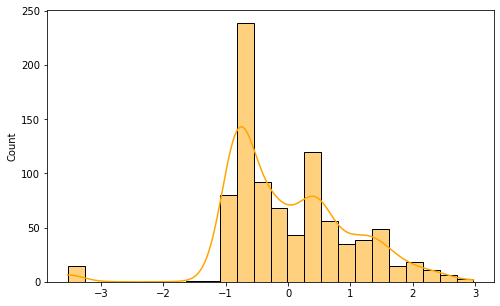

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(power_transform((df.Fare+1).values.reshape(-1, 1), method='box-cox').reshape(1,-1)[0], kde=True, color='orange', ax=ax)
plt.show()

# Categorical Values

### Let's use "Embarked"
- look at the data
- understand what it means
- figure out if you want to use it or not

In [22]:
df.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

## What about the Cabin?

In [23]:
df.Cabin.value_counts(dropna=False)

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
              ... 
D56              1
D7               1
B30              1
E58              1
B101             1
Name: Cabin, Length: 148, dtype: int64

In [24]:
len(df.Cabin.unique())/len(df)

0.16610549943883277

# Consider Variables Together
y = 'Survived'

categorical = 'Pclass', 'Sex', 'Embarked'

continuous = 'Age','SibSp', 'Parch','Fare'

IDs = 'Name', 'Cabin', 'Ticket'

## Correlation, Covariance, etc.

In [25]:
#*enforce types*
df.Pclass = df.Pclass.astype(str)

## Scatter Matrix

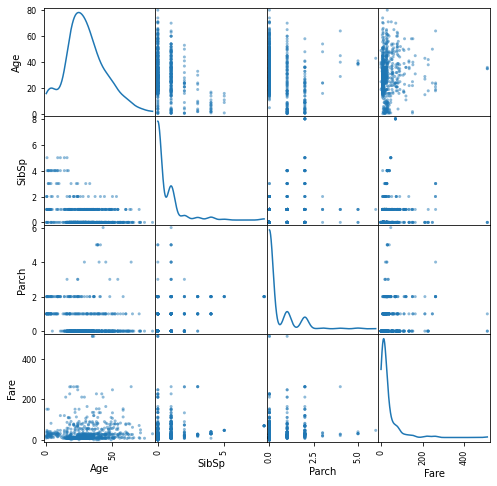

In [26]:
pd.plotting.scatter_matrix(df[['Age', 'SibSp', 'Parch', 'Fare']], figsize=(8,8), diagonal='kde')
plt.show()

## Correlation between Continuous Values

In [27]:
from itertools import combinations

In [28]:
for x,y in combinations(['Age', 'SibSp', 'Parch', 'Fare'], 2):
    print(f"{x} & {y}: {scipy.stats.pearsonr(df[x].fillna(0), df[y].fillna(0))[0]}")

Age & SibSp: -0.18466352835224442
Age & Parch: -0.0487860827201497
Age & Fare: 0.13551585352705098
SibSp & Parch: 0.4148376986201561
SibSp & Fare: 0.1596510432421609
Parch & Fare: 0.2162249447707647


 We have some pretty strong correlations here...
 - SibSp & Parch are fairly strongly correlated

# Correlation between Categorical Values

In [29]:
from toolbelt.stats import corr_ratio, theil_u, cramer_v

### Cramer-V: Symetric correlation between categorical values

In [30]:
for x,y in combinations(['Pclass', 'Sex', 'Embarked'], 2):
    print(f"{x} & {y}: {cramer_v(df[x], df[y])}")

Pclass & Sex: 0.12968965030528873
Pclass & Embarked: 0.25981056003546527
Sex & Embarked: 0.11307233125458868


### Theil-U: Knowledge of X|Y
1 = Y provides complete knowledge of X

0 = Y provides no knowledge of X

In [31]:
from itertools import permutations
for x,y in permutations(['Pclass', 'Sex', 'Embarked'], 2):
    print(f"{x}|{y} : {theil_u(df[x], df[y])}")

Pclass|Sex : 0.009525207886538684
Pclass|Embarked : 0.07400236523883963
Sex|Pclass : 0.014644059202641342
Sex|Embarked : 0.014929471211224541
Embarked|Pclass : 0.09532290804220596
Embarked|Sex : 0.012508611232640836


## Correlation between Continuous and Categorical Values

In [32]:
from itertools import product
for cont, cat in product(['Age', 'SibSp', 'Parch', 'Fare'], ['Pclass', 'Sex', 'Embarked']):
    print(f"{cont} & {cat} : {corr_ratio(df[cat], df[cont].fillna(0))}")

Age & Pclass : 0.1338765010448355
Age & Sex : 0.0006239238679916865
Age & Embarked : 0.05703680049879202
SibSp & Pclass : 0.008584423868436534
SibSp & Sex : 0.0131402226905357
SibSp & Embarked : 0.004903922085504395
Parch & Pclass : 0.000347923456371349
Parch & Sex : 0.06026482952641287
Parch & Embarked : 0.007227618845815484
Fare & Pclass : 0.35309422279795755
Fare & Sex : 0.03324526228258502
Fare & Embarked : 0.07910511831864096


- not surprising that there is a strong relationship between the fare ($) and passenger class
- very little relationship between gender and age

# Create Usable Data

In [33]:
# Make sure it isnt treated as a number, but as a category
df.age_quantile = df.age_quantile.astype(str)

In [34]:
from sklearn.preprocessing import StandardScaler
X_cols = ['age_quantile', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']
X = StandardScaler().fit_transform(pd.get_dummies(df[X_cols], drop_first=True).values)
y = df['Survived'].values
print(X.shape, y.shape)

(891, 12) (891,)


# Dimmensionality Reduction

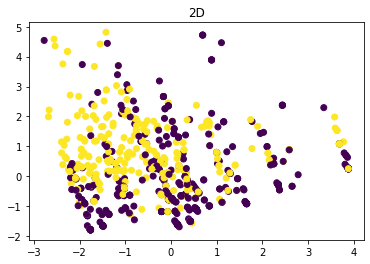

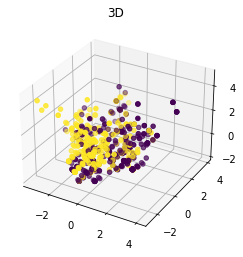

In [35]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pltX = PCA(n_components=2).fit_transform(X)
plt.scatter(pltX[:,0], pltX[:,1], c=y)
plt.title("2D")
plt.show()

pltX = PCA(n_components=3).fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pltX[:,2], pltX[:,0], pltX[:,1], c=y)
plt.title('3D')
plt.show()

In [45]:
X.shape

(891, 12)

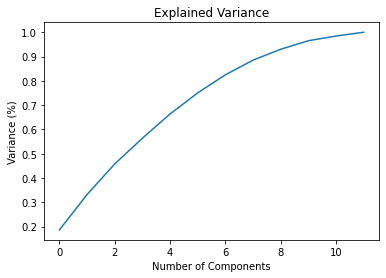

Features for 95%+ of variance:  10


In [36]:
pca = PCA().fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
#plt.ylim([0, 1])
plt.show()
for idx, x in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if x >= 0.95:
        print('Features for 95%+ of variance: ', idx+1)
        break

# Unsupervised Learning

In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics

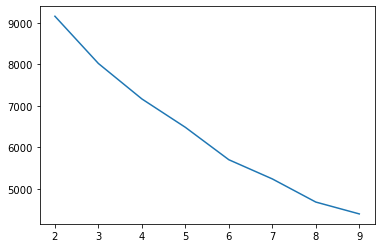

,tss,silhouette,davies_bouldin,calinski_harbaz,bic
clusters,,,,,
2,9157.927042,0.166873,2.313248,148.919166,-15039.860783
3,8018.765225,0.198661,1.895564,148.017333,-14589.635473
4,7163.977546,0.234101,1.773782,145.606073,-14288.279321
5,6479.467702,0.233725,1.660136,144.005024,-14061.017050
6,5697.903406,0.284486,1.548459,155.136905,-13579.741995
7,5235.304630,0.282234,1.431882,153.563770,-13339.882706
8,4677.331714,0.303075,1.279688,162.209458,-12877.197576
9,4391.396710,0.300523,1.284242,158.182364,-12713.026241


In [38]:
_metrics = []
for n in range(2,10):
    row = []
    cluster_model = KMeans(n_clusters=n, random_state=42)
    labels = cluster_model.fit_predict(X)
    row.append(n)
    row.append(cluster_model.inertia_)
    row.append(metrics.silhouette_score(X=X, labels=labels))
    row.append(metrics.davies_bouldin_score(X=X, labels=labels))
    row.append(metrics.calinski_harabasz_score(X=X, labels=labels))
    row.append(toolbelt.bic(cluster_model, X))
    _metrics.append(row)
results = pd.DataFrame(_metrics, columns = ['clusters', 'tss', 
                                           'silhouette', 'davies_bouldin', 
                                           'calinski_harbaz', 'bic'])
plt.plot(results.clusters, results.tss)
plt.show()
results.set_index('clusters')

* Silhouette index: close to 1 is good, close to -1 is bad
* Davies-Bouldin: lower is better
* Calinski-Harabasz: maximize
* BIC: minimize

## What if I only cluster the categorical variables?

In [39]:
X_cat_cols = ['age_quantile', 'Pclass', 'Sex', 'Embarked']
X_cat = pd.get_dummies(df[X_cat_cols], drop_first=True).values
print(X_cat.shape)

(891, 9)


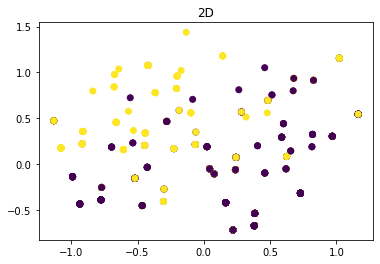

In [40]:
pltX = PCA(n_components=2).fit_transform(X_cat)
plt.scatter(pltX[:,0], pltX[:,1], c=y)
plt.title("2D")
plt.show()

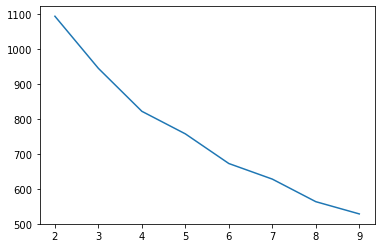

,tss,silhouette,davies_bouldin,calinski_harbaz,bic
clusters,,,,,
2,1093.401925,0.229172,1.890047,239.286461,-4070.332286
3,944.370133,0.238412,1.642851,208.436391,-3807.624701
4,821.591650,0.266823,1.588481,203.727883,-3607.822858
5,757.110491,0.268371,1.522741,184.486803,-3487.225725
6,672.322152,0.293001,1.418714,188.336695,-3201.546776
7,627.759685,0.307180,1.469143,178.357131,-3086.249960
8,563.235296,0.339417,1.272101,184.649443,-2809.287608
9,528.246501,0.350542,1.259486,179.377249,-2700.078871


In [41]:
_metrics = []
for n in range(2,10):
    row = []
    cluster_model = KMeans(n_clusters=n, random_state=42)
    labels = cluster_model.fit_predict(X_cat)
    row.append(n)
    row.append(cluster_model.inertia_)
    row.append(metrics.silhouette_score(X=X_cat, labels=labels))
    row.append(metrics.davies_bouldin_score(X=X_cat, labels=labels))
    row.append(metrics.calinski_harabasz_score(X=X_cat, labels=labels))
    row.append(toolbelt.bic(cluster_model, X_cat))
    _metrics.append(row)
results = pd.DataFrame(_metrics, columns = ['clusters', 'tss', 
                                           'silhouette', 'davies_bouldin', 
                                           'calinski_harbaz', 'bic'])
plt.plot(results.clusters, results.tss)
plt.show()
results.set_index('clusters')

## What if it is only the continuous values?

In [42]:
X_cont_cols = ['SibSp', 'Parch', 'Fare']
X_cont = StandardScaler().fit_transform(pd.get_dummies(df[X_cont_cols], drop_first=True).values)
print(X_cont.shape)

(891, 3)


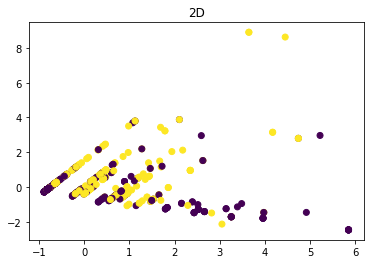

In [43]:
pltX = PCA(n_components=2).fit_transform(X_cont)
plt.scatter(pltX[:,0], pltX[:,1], c=y)
plt.title("2D")
plt.show()

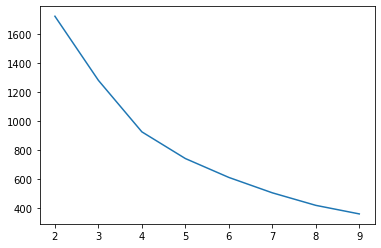

,tss,silhouette,davies_bouldin,calinski_harbaz,bic
clusters,,,,,
2,1720.720183,0.639427,1.111500,491.989787,-3620.471469
3,1279.516189,0.670406,0.933469,483.547467,-3285.609561
4,924.881048,0.608247,0.838024,558.839977,-3147.251083
5,741.208175,0.562633,0.870487,577.289759,-3126.886181
6,611.197551,0.615381,0.782543,597.088507,-2905.203058
7,505.291168,0.616433,0.727310,632.062835,-2802.645408
8,419.011629,0.622693,0.662846,678.560006,-2574.456811
9,360.060897,0.632600,0.675028,708.217800,-2349.484747


In [44]:
_metrics = []
for n in range(2,10):
    row = []
    cluster_model = KMeans(n_clusters=n, random_state=42)
    labels = cluster_model.fit_predict(X_cont)
    row.append(n)
    row.append(cluster_model.inertia_)
    row.append(metrics.silhouette_score(X=X_cont, labels=labels))
    row.append(metrics.davies_bouldin_score(X=X_cont, labels=labels))
    row.append(metrics.calinski_harabasz_score(X=X_cont, labels=labels))
    row.append(toolbelt.bic(cluster_model, X_cont))
    _metrics.append(row)
results = pd.DataFrame(_metrics, columns = ['clusters', 'tss', 
                                           'silhouette', 'davies_bouldin', 
                                           'calinski_harbaz', 'bic'])
plt.plot(results.clusters, results.tss)
plt.show()
results.set_index('clusters')